# 20 Newsgroups Benchmarks

This notebook contains benchmarks for various models implemented in gobbli using the 20 Newsgroups classification dataset.

In [1]:
%matplotlib inline

import logging

from IPython.display import display
from matplotlib import pyplot as plt
import pandas as pd

from gobbli.dataset.newsgroups import NewsgroupsDataset
from gobbli.model.fasttext import FastText
from gobbli.model.bert import BERT
from gobbli.model.mtdnn import MTDNN
from gobbli.model.transformer import Transformer

import benchmark
benchmark.init_benchmark_env()

In [2]:
ds = NewsgroupsDataset.load()
X_train_valid, X_test = ds.X_train(), ds.X_test()
y_train_valid, y_test = ds.y_train(), ds.y_test()

In [3]:
X_train_valid_fasttext, X_test_fasttext = benchmark.fasttext_preprocess(X_train_valid), benchmark.fasttext_preprocess(X_test)
X_train_valid_bert, X_test_bert = benchmark.bert_preprocess(X_train_valid), benchmark.bert_preprocess(X_test)

In [4]:
def analyze_results(results):
    display(pd.DataFrame(results.training_results))
    
    print(results.metrics_report())
    
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot()
    ax = results.plot(ax=ax)
    
    plt.show()

def evaluate_model(model_cls, X, y, test_dataset, param_grid, run_kwargs=None):
    results = benchmark.run_benchmark_experiment(f"newsgroups_{model_cls.__name__}",
                                                 X_train_valid, y_train_valid,
                                                 model_cls, param_grid,
                                                 test_dataset=test_dataset,
                                                 worker_log_level=logging.INFO,
                                                 run_kwargs=run_kwargs)
    analyze_results(results)
    return results

(pid=73) INFO:gobbli.experiment.base:Starting build.
(pid=73) INFO:gobbli.experiment.base:Downloading pre-trained weights.
(pid=73) INFO:gobbli.experiment.base:Weights downloaded.
(pid=73) INFO:gobbli.experiment.base:Build finished in 3.36 sec.
(pid=73) INFO:gobbli.experiment.base:Starting training.
(pid=73) INFO:gobbli.experiment.base:Training finished in 881.23 sec.
(pid=73) INFO:gobbli.experiment.base:RESULTS:
(pid=73) INFO:gobbli.experiment.base:  Validation loss: 0.3483077
(pid=73) INFO:gobbli.experiment.base:  Validation accuracy: 0.91117984
(pid=73) INFO:gobbli.experiment.base:  Training loss: 0.34705663
(pid=266) INFO:gobbli.experiment.base:Starting build.
(pid=266) INFO:gobbli.experiment.base:Downloading pre-trained weights.
(pid=266) INFO:gobbli.experiment.base:Weights downloaded.
(pid=266) INFO:gobbli.experiment.base:Build finished in 19.04 sec.
(pid=266) INFO:gobbli.experiment.base:Starting training.
(pid=266) INFO:gobbli.experiment.base:Training finished in 881.30 sec.
(pi

,valid_loss,valid_accuracy,train_loss,labels,checkpoint,node_ip_address,model_params
0,0.348308,0.911180,0.347057,"[alt.atheism, comp.graphics, comp.os.ms-window...",benchmark_data/model/BERT/4265b298b721451bbd2a...,192.168.80.2,"{'bert_model': 'bert-base-uncased', 'max_seq_l..."
1,0.385361,0.900133,0.384135,"[alt.atheism, comp.graphics, comp.os.ms-window...",benchmark_data/model/BERT/cffd57b013f84e05b9e3...,192.168.80.2,"{'bert_model': 'scibert-uncased', 'max_seq_len..."


Metrics:
--------
Weighted F1 Score: 0.8031366988684516
Weighted Precision Score: 0.8097279479346217
Weighted Recall Score: 0.8035050451407328
Accuracy: 0.8035050451407328

Classification Report:
----------------------
                          precision    recall  f1-score   support

             alt.atheism       0.60      0.47      0.53       319
           comp.graphics       0.80      0.70      0.75       389
 comp.os.ms-windows.misc       0.71      0.82      0.76       394
comp.sys.ibm.pc.hardware       0.61      0.72      0.66       392
   comp.sys.mac.hardware       0.85      0.78      0.81       385
          comp.windows.x       0.80      0.81      0.80       395
            misc.forsale       0.87      0.86      0.86       390
               rec.autos       0.91      0.89      0.90       396
         rec.motorcycles       0.86      0.85      0.86       398
      rec.sport.baseball       0.98      0.93      0.96       397
        rec.sport.hockey       0.97      0.98      0.9

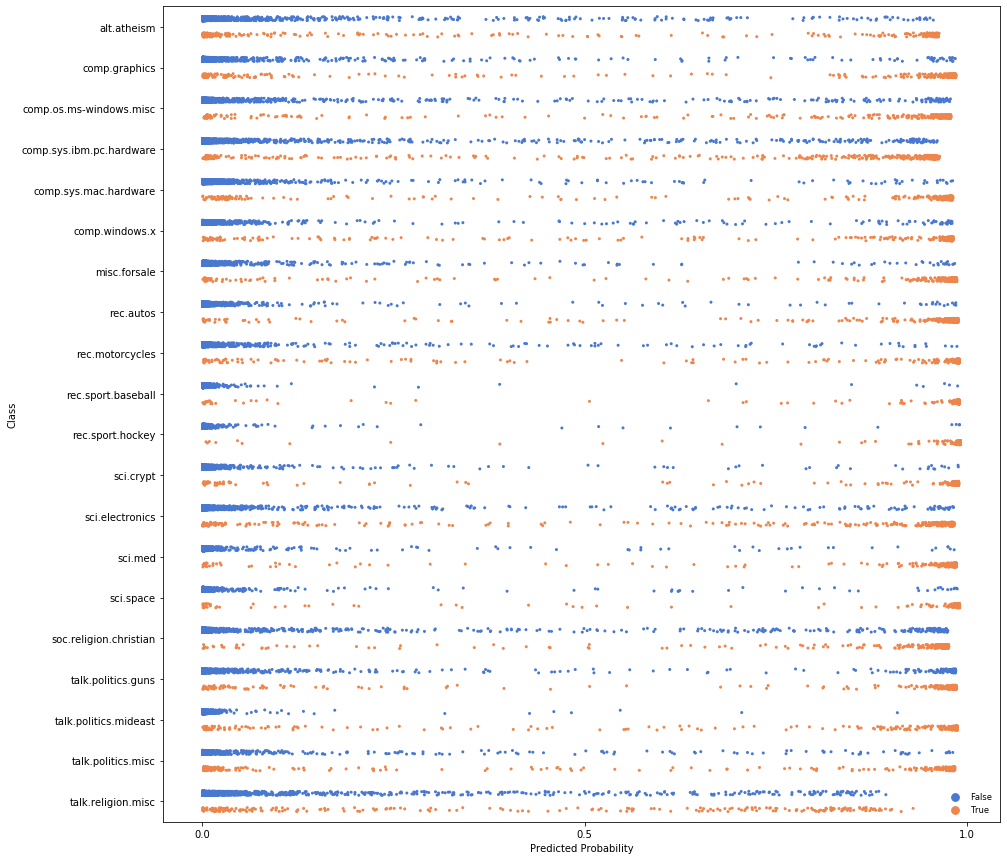

In [5]:
evaluate_model(BERT, X_train_valid_bert, y_train_valid, (X_test_bert, y_test), {
    "bert_model": ["bert-base-uncased", "scibert-uncased"],
    "max_seq_length": [128],
});

(pid=407) INFO:gobbli.experiment.base:Starting build.
(pid=407) INFO:gobbli.experiment.base:Downloading pre-trained weights.
(pid=407) INFO:gobbli.experiment.base:Weights downloaded.
(pid=407) INFO:gobbli.experiment.base:Build finished in 2.05 sec.
(pid=407) INFO:gobbli.experiment.base:Starting training.
(pid=407) /code/gobbli/model/mtdnn/model.py:193: UserWarning: MT-DNN model does not support separate validation batch size; using train batch size '{train_input.train_batch_size}' for both training and validation.
(pid=407)   "MT-DNN model does not support separate validation batch size; "
(pid=407) INFO:gobbli.experiment.base:Training finished in 1276.76 sec.
(pid=407) INFO:gobbli.experiment.base:RESULTS:
(pid=407) INFO:gobbli.experiment.base:  Validation loss: 2.267821788787842
(pid=407) INFO:gobbli.experiment.base:  Validation accuracy: 0.8798055678303137
(pid=407) INFO:gobbli.experiment.base:  Training loss: 2.188384532928467
(pid=591) INFO:gobbli.experiment.base:Starting build.
(p

,valid_loss,valid_accuracy,train_loss,labels,checkpoint,node_ip_address,model_params
0,2.267822,0.879806,2.188385,"[alt.atheism, comp.graphics, comp.os.ms-window...",benchmark_data/model/MTDNN/5a80e2f3349b430fb90...,192.168.80.2,"{'max_seq_length': 128, 'mtdnn_model': 'mt-dnn..."


(pid=591) INFO:gobbli.experiment.base:Prediction finished in 96.81 sec.
Metrics:
--------
Weighted F1 Score: 0.7827273017518019
Weighted Precision Score: 0.7937820628172046
Weighted Recall Score: 0.7846521508231545
Accuracy: 0.7846521508231545

Classification Report:
----------------------
                          precision    recall  f1-score   support

             alt.atheism       0.65      0.35      0.46       319
           comp.graphics       0.79      0.69      0.74       389
 comp.os.ms-windows.misc       0.76      0.82      0.79       394
comp.sys.ibm.pc.hardware       0.63      0.66      0.64       392
   comp.sys.mac.hardware       0.85      0.74      0.79       385
          comp.windows.x       0.87      0.74      0.80       395
            misc.forsale       0.72      0.94      0.81       390
               rec.autos       0.90      0.84      0.87       396
         rec.motorcycles       0.90      0.79      0.84       398
      rec.sport.baseball       0.98      0.92   

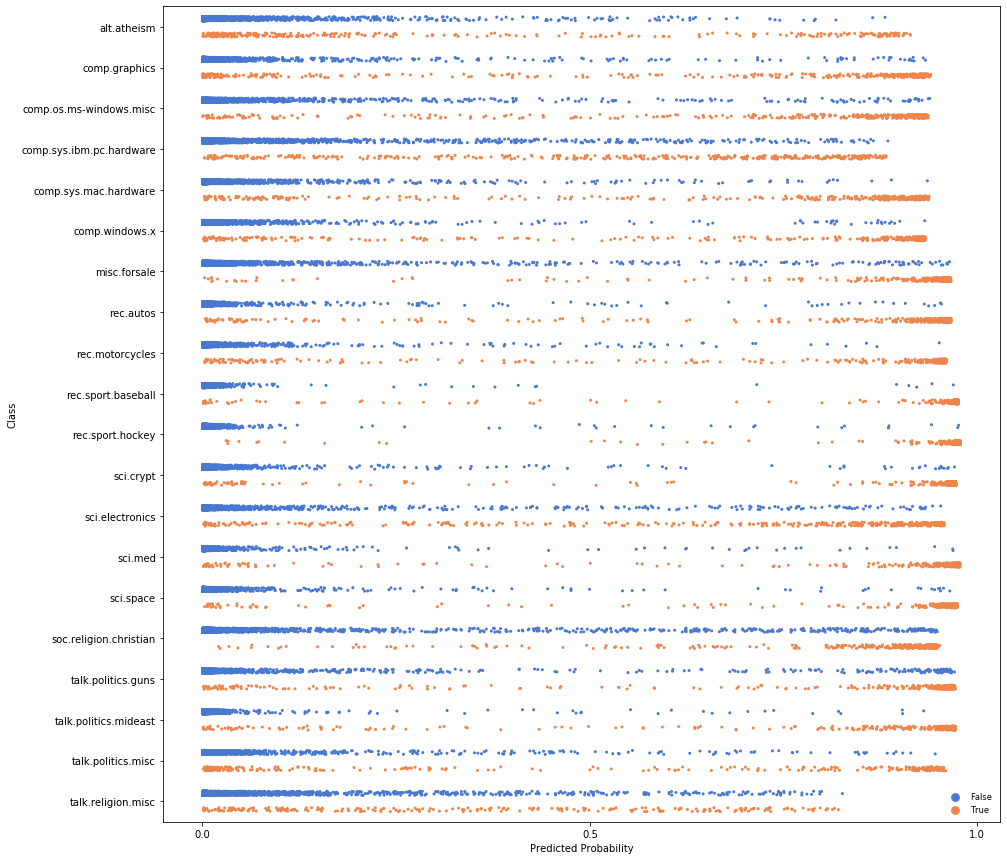

In [6]:
evaluate_model(MTDNN, X_train_valid_bert, y_train_valid, (X_test_bert, y_test), {
    "mtdnn_model": ["mt-dnn-base"],
    "max_seq_length": [128],
}, run_kwargs={"train_batch_size": 16});

(pid=730) INFO:gobbli.experiment.base:Starting build.
(pid=730) INFO:gobbli.experiment.base:Build finished in 0.00 sec.
(pid=730) INFO:gobbli.experiment.base:Starting training.
(pid=729) INFO:gobbli.experiment.base:Starting build.
(pid=729) INFO:gobbli.experiment.base:Build finished in 0.00 sec.
(pid=729) INFO:gobbli.experiment.base:Starting training.
(pid=735) INFO:gobbli.experiment.base:Starting build.
(pid=735) INFO:gobbli.experiment.base:Build finished in 0.00 sec.
(pid=735) INFO:gobbli.experiment.base:Starting training.
(pid=728) INFO:gobbli.experiment.base:Starting build.
(pid=728) INFO:gobbli.experiment.base:Build finished in 0.00 sec.
(pid=728) INFO:gobbli.experiment.base:Starting training.
(pid=731) INFO:gobbli.experiment.base:Starting build.
(pid=731) INFO:gobbli.experiment.base:Build finished in 0.00 sec.
(pid=731) INFO:gobbli.experiment.base:Starting training.
(pid=734) INFO:gobbli.experiment.base:Starting build.
(pid=734) INFO:gobbli.experiment.base:Build finished in 0.00 

,valid_loss,valid_accuracy,train_loss,labels,checkpoint,node_ip_address,model_params
0,-0.598763,0.598763,2.003626,"[alt.atheism, comp.graphics, comp.os.ms-window...",benchmark_data/model/FastText/3809015481974b74...,192.168.80.2,"{'dim': 100, 'lr': 0.5, 'word_ngrams': 1}"
1,-0.255855,0.255855,2.666669,"[alt.atheism, comp.graphics, comp.os.ms-window...",benchmark_data/model/FastText/3598c2b299b34e0b...,192.168.80.2,"{'dim': 100, 'lr': 0.5, 'word_ngrams': 2}"
2,-0.802475,0.802475,1.115508,"[alt.atheism, comp.graphics, comp.os.ms-window...",benchmark_data/model/FastText/12263e15834141f2...,192.168.80.2,"{'dim': 100, 'lr': 1.0, 'word_ngrams': 1}"
3,-0.681396,0.681396,1.841391,"[alt.atheism, comp.graphics, comp.os.ms-window...",benchmark_data/model/FastText/c4ee224c25ce4907...,192.168.80.2,"{'dim': 100, 'lr': 1.0, 'word_ngrams': 2}"
4,-0.567830,0.567830,2.119185,"[alt.atheism, comp.graphics, comp.os.ms-window...",benchmark_data/model/FastText/0f24a6d057e148fd...,192.168.80.2,"{'dim': 300, 'lr': 0.5, 'word_ngrams': 1}"
5,-0.235086,0.235086,2.717496,"[alt.atheism, comp.graphics, comp.os.ms-window...",benchmark_data/model/FastText/9fa9b6948bf942fa...,192.168.80.2,"{'dim': 300, 'lr': 0.5, 'word_ngrams': 2}"
6,-0.813522,0.813522,1.131953,"[alt.atheism, comp.graphics, comp.os.ms-window...",benchmark_data/model/FastText/8e05316e67c745cc...,192.168.80.2,"{'dim': 300, 'lr': 1.0, 'word_ngrams': 1}"
7,-0.642952,0.642952,1.760178,"[alt.atheism, comp.graphics, comp.os.ms-window...",benchmark_data/model/FastText/8977fee237224b65...,192.168.80.2,"{'dim': 300, 'lr': 1.0, 'word_ngrams': 2}"



Metrics:
--------
Weighted F1 Score: 0.6662816013988826
Weighted Precision Score: 0.6815213642681653
Weighted Recall Score: 0.6708709506107275
Accuracy: 0.6708709506107275

Classification Report:
----------------------
                          precision    recall  f1-score   support

             alt.atheism       0.55      0.36      0.44       319
           comp.graphics       0.50      0.68      0.58       389
 comp.os.ms-windows.misc       0.65      0.70      0.67       394
comp.sys.ibm.pc.hardware       0.59      0.59      0.59       392
   comp.sys.mac.hardware       0.72      0.68      0.70       385
          comp.windows.x       0.66      0.70      0.68       395
            misc.forsale       0.74      0.76      0.75       390
               rec.autos       0.77      0.70      0.74       396
         rec.motorcycles       0.92      0.69      0.79       398
      rec.sport.baseball       0.87      0.78      0.82       397
        rec.sport.hockey       0.88      0.90      0.

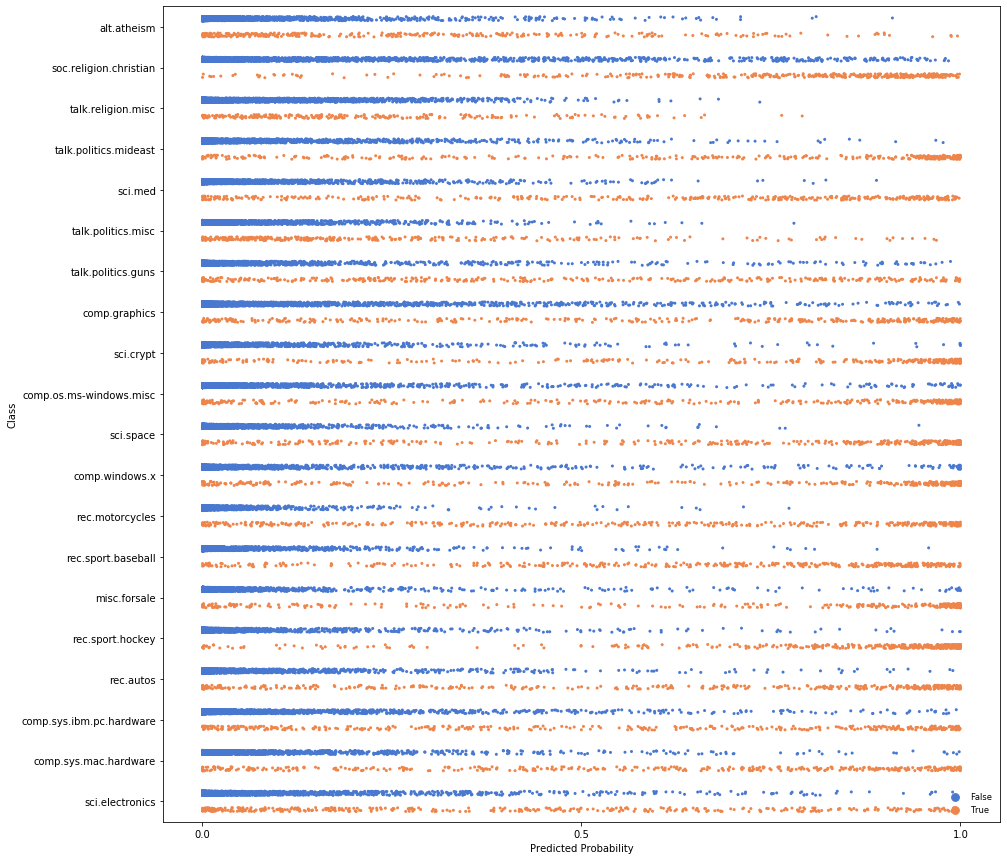

In [7]:
evaluate_model(FastText, X_train_valid_fasttext, y_train_valid, (X_test_fasttext, y_test), {
    "word_ngrams": [1, 2],
    "dim": [100, 300],
    "lr": [0.5, 1.0],
});

(pid=1168) INFO:gobbli.experiment.base:Starting build.
(pid=1168) INFO:gobbli.experiment.base:Build finished in 0.50 sec.
(pid=1168) INFO:gobbli.experiment.base:Starting training.
(pid=1168) INFO:gobbli.experiment.base:Training finished in 1691.13 sec.
(pid=1168) INFO:gobbli.experiment.base:RESULTS:
(pid=1168) INFO:gobbli.experiment.base:  Validation loss: 0.094207419582136
(pid=1168) INFO:gobbli.experiment.base:  Validation accuracy: 0.047724259832081305
(pid=1168) INFO:gobbli.experiment.base:  Training loss: 0.21352073414235362
(pid=1354) INFO:gobbli.experiment.base:Starting build.
(pid=1354) INFO:gobbli.experiment.base:Build finished in 0.28 sec.
(pid=1354) INFO:gobbli.experiment.base:Starting training.
(pid=1354) INFO:gobbli.experiment.base:Training finished in 1156.57 sec.
(pid=1354) INFO:gobbli.experiment.base:RESULTS:
(pid=1354) INFO:gobbli.experiment.base:  Validation loss: 0.022224081152580084
(pid=1354) INFO:gobbli.experiment.base:  Validation accuracy: 0.8683163941670349
(pi

,valid_loss,valid_accuracy,train_loss,labels,checkpoint,node_ip_address,model_params
0,0.094207,0.047724,0.213521,"[alt.atheism, comp.graphics, comp.os.ms-window...",benchmark_data/model/Transformer/990b5c95f4224...,192.168.80.2,"{'transformer_model': 'XLM', 'transformer_weig..."
1,0.022224,0.868316,0.006443,"[alt.atheism, comp.graphics, comp.os.ms-window...",benchmark_data/model/Transformer/3d400ddd6c884...,192.168.80.2,"{'transformer_model': 'XLM', 'transformer_weig..."


(pid=1354) INFO:gobbli.experiment.base:Prediction finished in 85.65 sec.
Metrics:
--------
Weighted F1 Score: 0.7024088521964474
Weighted Precision Score: 0.7354819750834384
Weighted Recall Score: 0.7032660647902284
Accuracy: 0.7032660647902284

Classification Report:
----------------------
                          precision    recall  f1-score   support

             alt.atheism       0.77      0.27      0.40       319
           comp.graphics       0.61      0.71      0.66       389
 comp.os.ms-windows.misc       0.62      0.61      0.61       394
comp.sys.ibm.pc.hardware       0.69      0.45      0.54       392
   comp.sys.mac.hardware       0.67      0.72      0.69       385
          comp.windows.x       0.76      0.77      0.77       395
            misc.forsale       0.81      0.82      0.81       390
               rec.autos       0.88      0.77      0.82       396
         rec.motorcycles       0.85      0.78      0.81       398
      rec.sport.baseball       0.87      0.84  

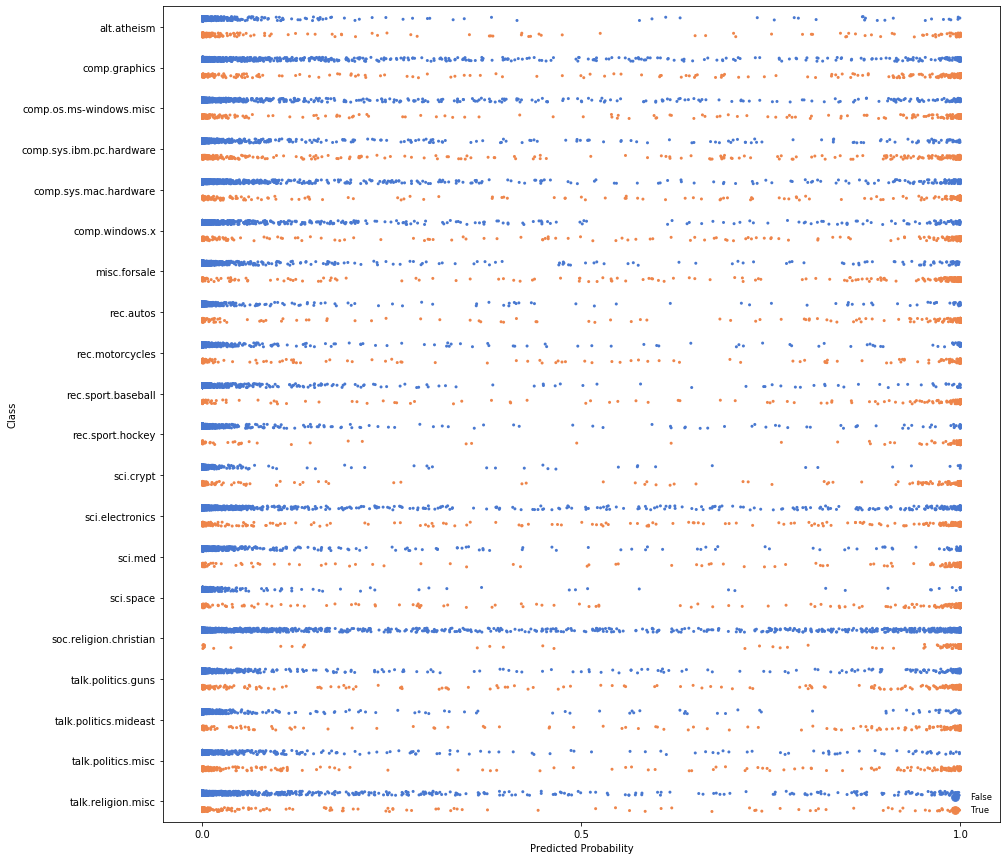

In [8]:
evaluate_model(Transformer, X_train_valid_bert, y_train_valid, (X_test_bert, y_test), {
    "transformer_weights": ["xlm-mlm-tlm-xnli15-1024", "xlm-clm-ende-1024"],
    "transformer_model": ["XLM"],
}, run_kwargs={"train_batch_size": 16});

(pid=1489) INFO:gobbli.experiment.base:Starting build.
(pid=1489) INFO:gobbli.experiment.base:Build finished in 0.35 sec.
(pid=1489) INFO:gobbli.experiment.base:Starting training.
(pid=1489) INFO:gobbli.experiment.base:Training finished in 1272.89 sec.
(pid=1489) INFO:gobbli.experiment.base:RESULTS:
(pid=1489) INFO:gobbli.experiment.base:  Validation loss: 0.016200355148347036
(pid=1489) INFO:gobbli.experiment.base:  Validation accuracy: 0.9058771542200619
(pid=1489) INFO:gobbli.experiment.base:  Training loss: 0.0031477594026829998
(pid=1499) INFO:gobbli.experiment.base:Starting build.
(pid=1499) INFO:gobbli.experiment.base:Build finished in 0.28 sec.
(pid=1499) INFO:gobbli.experiment.base:Starting prediction.
(pid=1499) INFO:gobbli.experiment.base:Prediction finished in 68.12 sec.


,valid_loss,valid_accuracy,train_loss,labels,checkpoint,node_ip_address,model_params
0,0.0162,0.905877,0.003148,"[alt.atheism, comp.graphics, comp.os.ms-window...",benchmark_data/model/Transformer/fc3071e7b6144...,192.168.80.2,"{'transformer_model': 'XLNet', 'transformer_we..."


Metrics:
--------
Weighted F1 Score: 0.710284424362952
Weighted Precision Score: 0.7479635598110155
Weighted Recall Score: 0.7059214020180563
Accuracy: 0.7059214020180563

Classification Report:
----------------------
                          precision    recall  f1-score   support

             alt.atheism       0.72      0.31      0.43       319
           comp.graphics       0.74      0.64      0.68       389
 comp.os.ms-windows.misc       0.72      0.59      0.65       394
comp.sys.ibm.pc.hardware       0.52      0.72      0.60       392
   comp.sys.mac.hardware       0.80      0.52      0.63       385
          comp.windows.x       0.77      0.79      0.78       395
            misc.forsale       0.64      0.97      0.77       390
               rec.autos       0.86      0.81      0.84       396
         rec.motorcycles       0.91      0.68      0.78       398
      rec.sport.baseball       0.83      0.80      0.81       397
        rec.sport.hockey       0.92      0.70      0.79

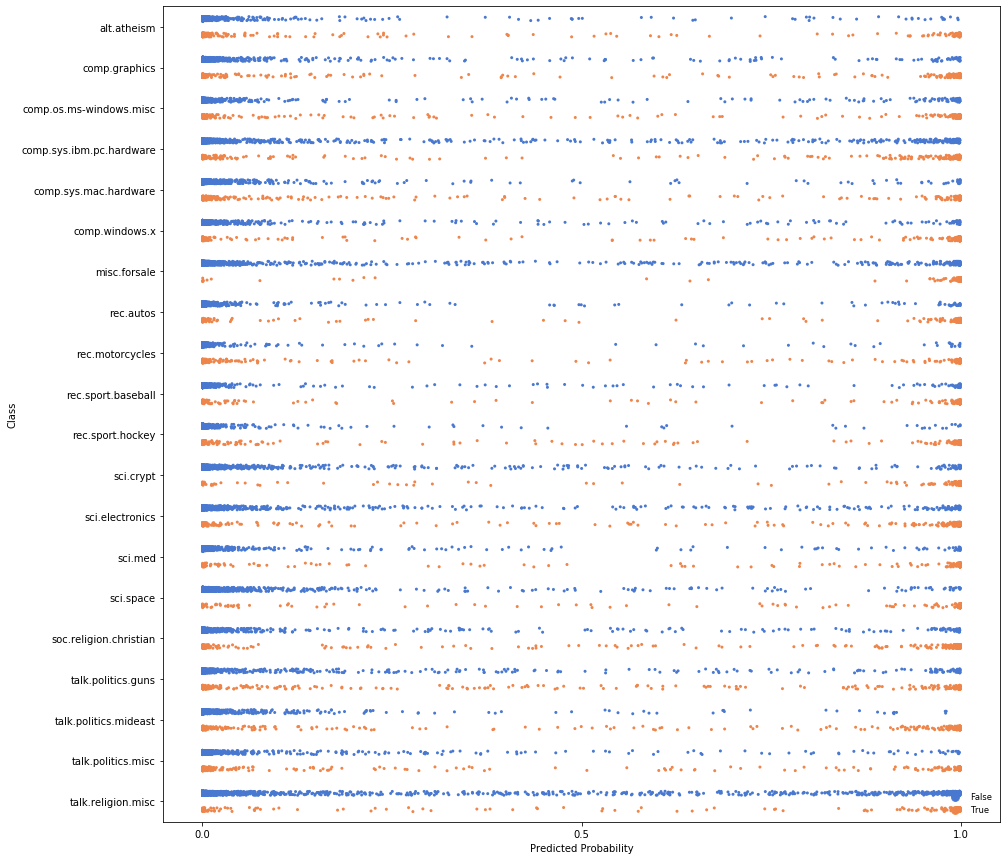

In [9]:
evaluate_model(Transformer, X_train_valid_bert, y_train_valid, (X_test_bert, y_test), {
    "transformer_weights": ["xlnet-base-cased"],
    "transformer_model": ["XLNet"],
}, run_kwargs={"train_batch_size": 16});

(pid=1812) INFO:gobbli.experiment.base:Starting build.
(pid=1812) INFO:gobbli.experiment.base:Build finished in 0.27 sec.
(pid=1812) INFO:gobbli.experiment.base:Starting training.
(pid=1812) INFO:gobbli.experiment.base:Training finished in 1024.47 sec.
(pid=1812) INFO:gobbli.experiment.base:RESULTS:
(pid=1812) INFO:gobbli.experiment.base:  Validation loss: 0.01709035464977723
(pid=1812) INFO:gobbli.experiment.base:  Validation accuracy: 0.895271763146266
(pid=1812) INFO:gobbli.experiment.base:  Training loss: 0.006298969459328226
(pid=1998) INFO:gobbli.experiment.base:Starting build.
(pid=1998) INFO:gobbli.experiment.base:Build finished in 0.28 sec.
(pid=1998) INFO:gobbli.experiment.base:Starting prediction.


,valid_loss,valid_accuracy,train_loss,labels,checkpoint,node_ip_address,model_params
0,0.01709,0.895272,0.006299,"[alt.atheism, comp.graphics, comp.os.ms-window...",benchmark_data/model/Transformer/b20f3ea6e02c4...,192.168.80.2,"{'transformer_model': 'Roberta', 'transformer_..."


(pid=1998) INFO:gobbli.experiment.base:Prediction finished in 56.40 sec.
Metrics:
--------
Weighted F1 Score: 0.7379325343199092
Weighted Precision Score: 0.7529590328868873
Weighted Recall Score: 0.737254381306426
Accuracy: 0.737254381306426

Classification Report:
----------------------
                          precision    recall  f1-score   support

             alt.atheism       0.73      0.45      0.56       319
           comp.graphics       0.60      0.75      0.67       389
 comp.os.ms-windows.misc       0.79      0.58      0.67       394
comp.sys.ibm.pc.hardware       0.62      0.63      0.62       392
   comp.sys.mac.hardware       0.85      0.56      0.67       385
          comp.windows.x       0.73      0.86      0.79       395
            misc.forsale       0.78      0.89      0.83       390
               rec.autos       0.84      0.82      0.83       396
         rec.motorcycles       0.90      0.64      0.75       398
      rec.sport.baseball       0.89      0.80    

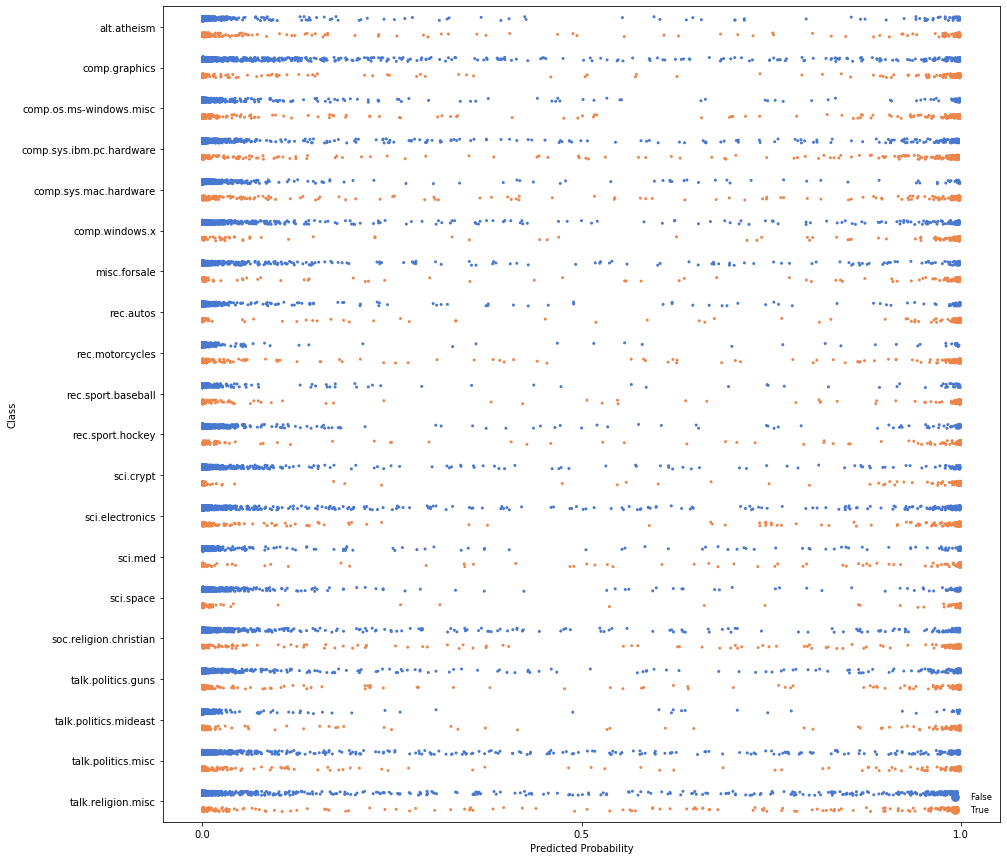

In [10]:
evaluate_model(Transformer, X_train_valid_bert, y_train_valid, (X_test_bert, y_test), {
    "transformer_weights": ["roberta-base"],
    "transformer_model": ["Roberta"],
}, run_kwargs={"train_batch_size": 16});